# Data Challenge 12 — Intro to Logistic Regression

**Hook (Attention Grabber)**  
> “If an app told a restaurant it has an 80% chance of getting an **A** on inspection, would you trust it?”

**Learning Goals**
- Show why **linear regression** is a bad fit for a **binary (0/1)** target.
- Fit a **one-feature logistic regression** and interpret probabilities.
- Extend to a **two-feature logistic model with standardized inputs**.
- Communicate results using **AWES** and discuss **ethics & people impact**.

**Data:** June 1, 2025 - Nov 4, 2025 Restaurant Health Inspection

[Restaurant Health Inspection](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data)


## Instructor Guidance

**Hint: Use the Lecture Deck, Canvas Reading, and Docs to help you with the code**

Use this guide live; students implement below.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- LinearRegression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- LogisticRegression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- StandardScaler — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- accuracy_score — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- corr — pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

### Pseudocode Plan (Linear vs Logistic + Scaling)
1) **Load CSV** → preview shape/columns; keep needed fields.  
2) **Engineer binary Y**: `is_A = 1 if grade == 'A' else 0`.  
3) **Pick numeric X**:  
   - **X1:** `score` (inspection score; lower is better)  
   - **X2:** `critical_num = 1 if critical_flag == 'Critical' else 0` (for extension)  
4) **Split** → `X_train, X_test, y_train, y_test` (70/30, stratify by Y, fixed random_state).  
5) **Model A (Incorrect)** → **LinearRegression** on Y~X1:  
   - Report **MSE**, **R²**, count predictions **<0 or >1**,  
6) **Model B (Correct)** → **LogisticRegression** on Y~X1:  
   - Report **Accuracy**
7) **Visual (OPTIONAL)** → scatter Y vs X1 with **linear line** vs **logistic sigmoid** curve  
8) **Extension** → scale X1+X2 with **StandardScaler**; fit **LogisticRegression**:  
   - Compare **Accuracy** to one-feature logistic  
9) **Interpret** → 2–3 sentences on why linear fails and how logistic fixes it  


## You Do — Student Section
Work in pairs. Comment your choices briefly. Keep code simple—only coerce the columns you use.

## Step 1 — Imports and Plot Defaults

In [ ]:
# Step 1 - Load CSV & Preview
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Step 2 — Load CSV & Preview
- Point to your New York City Restaurant Inspection Data 

In [2]:

df = pd.read_csv('/Users/Marcy_Student/Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results_20251104 copy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291278 entries, 0 to 291277
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  291278 non-null  int64  
 1   DBA                    291274 non-null  object 
 2   BORO                   291278 non-null  object 
 3   BUILDING               290428 non-null  object 
 4   STREET                 291267 non-null  object 
 5   ZIPCODE                288169 non-null  float64
 6   PHONE                  291271 non-null  object 
 7   CUISINE DESCRIPTION    287380 non-null  object 
 8   INSPECTION DATE        291278 non-null  object 
 9   ACTION                 287380 non-null  object 
 10  VIOLATION CODE         285078 non-null  object 
 11  VIOLATION DESCRIPTION  285078 non-null  object 
 12  CRITICAL FLAG          291278 non-null  object 
 13  SCORE                  274939 non-null  float64
 14  GRADE                  142210 non-nu

## Step 3 — Clean and Engineer Features
- Make sure `SCORE` is numeric and do any other data type clean-up 
- Engineer binary target variable (Y) based on instructor guidance above `is_A`
- Engineer binary predictor (X) based on instructor guidance above `critical_num`


In [3]:
df['is_A'] = (df['GRADE'] == 'A').astype(int)

# Create a numeric critical flag: 1 if 'Critical', 0 otherwise
if 'CRITICAL FLAG' in df.columns:
    df['critical_binary'] = df['CRITICAL FLAG'].map(lambda x: 1 if str(x).strip().lower() == 'critical' else 0)
else:
    df['critical_binary'] = 0

# Ensure SCORE is numeric and drop rows missing key values for the modelling steps
df['SCORE'] = pd.to_numeric(df['SCORE'], errors='coerce')
df = df.dropna(subset=['SCORE', 'is_A'])


## Step 4 — Split Data (70/30 Stratify by Target)

In [4]:

X = df[['SCORE']]
y = df['is_A']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

## Step 5 — Model A: Linear Regression on a Binary Target (Incorrect)

- Fit `is_A (Y var) ~ SCORE (X pred)` using **LinearRegression**  
- Report **MSE**, **R²**, and how many predictions fall outside [0, 1]  
- Estimate accuracy by thresholding predictions at 0.5 (done for you but understand the code) 

💡 Hint:  
`accuracy_score(y_test, (y_pred >= 0.5).astype(int))`

In [5]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
outside_bounds = np.sum((y_pred < 0) | (y_pred > 1))
accuracy = accuracy_score(y_test, (y_pred >= 0.5).astype(int))

print(f"MSE: {mse:.4f}, Rsquared: {r2:.4f}")
print(f"Predictions outside [0,1]: {outside_bounds}")
print(f"Approx accuracy (threshold 0.5): {accuracy:.4f}")

MSE: 0.1498, Rsquared: 0.3417
Predictions outside [0,1]: 8596
Approx accuracy (threshold 0.5): 0.9528


## Step 6 — Model B: Logistic Regression (One Feature)

- Fit `is_A ~ score` using **LogisticRegression**  
- Compute predictions with `.predict()`  
- Evaluate accuracy with `accuracy_score()`

In [6]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)

## Step 7 (OPTIONAL) — Visual Comparison: Linear vs Logistic


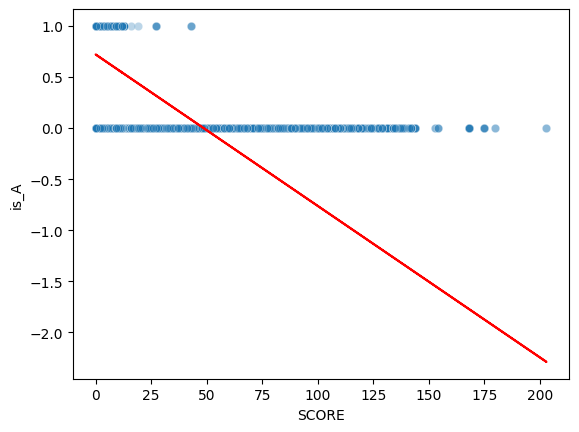

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/var/folders/_z/410cfm6x4fl_4m_6s41fnf4w0000gp/T/ipykernel_89328/1136048429.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


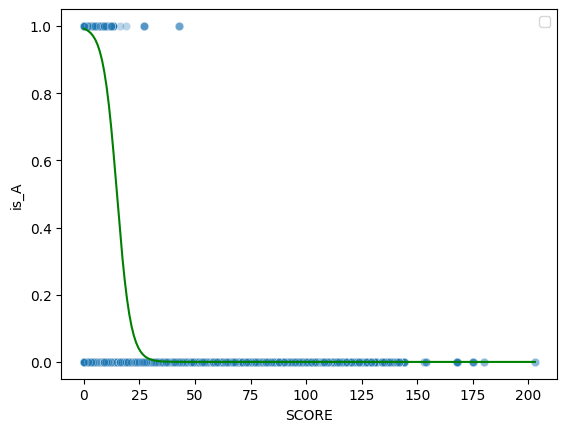

In [ ]:
sns.scatterplot(x=X_test['SCORE'], y=y_test, alpha=0.3)

#linear
plt.plot(X_test, y_pred, color='red')
plt.xlabel('SCORE')
plt.ylabel('is_A')
plt.show()

#logistic
sns.scatterplot(x=X_test['SCORE'], y=y_test, alpha=0.3)
x_vals = np.linspace(X_test['SCORE'].min(), X_test['SCORE'].max(), 200).reshape(-2,1)
y_vals = log_model.predict_proba(x_vals)[:,1]
plt.plot(x_vals, y_vals, color='green')

plt.xlabel('SCORE')
plt.ylabel('is_A')
plt.legend()
plt.show()

## Step 8 — Logistic Regression with Two **Scaled** Features

- Use `SCORE` and `critical_num` as your two X predictors that need to be scaled
- Look at documentation above to see how you would fit a StandardScalar() object 


In [8]:
X2 = df[['SCORE', 'critical_binary']]

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train2, y_test2 = train_test_split(
    X2_scaled, y, test_size=0.3, stratify=y, random_state=42
)

log_model2 = LogisticRegression()
log_model2.fit(X2_train, y_train2)

y_pred2 = log_model2.predict(X2_test)
accuracy2 = accuracy_score(y_test2, y_pred2)

print(f"Two-feature Logistic Regression Accuracy: {accuracy2:.4f}")

Two-feature Logistic Regression Accuracy: 0.9504


# We Share — Reflection & Wrap-Up

Write **two short paragraphs** (4–6 sentences each). Be specific and use evidence from your notebook.

1️⃣ **How do you know Linear Regression was a poor model choice for this task?**  
Describe what you observed in your results or plots that showed it didn’t work well for a binary outcome.  
Consider: Were predictions outside 0–1? Did the fit look wrong? What happened when you used 0.5 as a cutoff?  
Connect this to the idea that classification models should output probabilities between 0 and 1.

2️⃣ **When should we scale features in logistic regression (and when not to)?**  
Explain what scaling does, and why it might (or might not) matter for different kinds of features.  
Use this project to reason through whether `score` and `critical_num` needed scaling.  
Hint: Think about what “continuous” vs “binary” means for scaling decisions.

Linear regression doesn’t really work well when your target is just 0 or 1. When we ran it on is_A, some of the predictions were negative or greater than 1, which obviously doesn’t make sense for a probability. Even if we tried to classify by saying anything above 0.5 is an A, the fit looked off and didn’t capture the way the chance of getting an A changes with SCORE. Logistic regression fixed this because it naturally outputs probabilities between 0 and 1 and has that curve that fits the data better.

Scaling is useful when your features are on really different scales, so the model can treat them more equally. In our case, SCORE is a continuous number and critical_binary is just 0 or 1, so scaling helps SCORE not dominate the optimization. Scaling made the two-feature logistic model easier for the algorithm and gave us a slightly better fit.